In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from numpy import argmax

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_excel('data.xlsx')
data.head(10)

,Year,Destination,Quantity (In MT),% to TotaI,Unit VaIue ₹/Tonne,Total Value (Rs. In Cr)
0,2009,ITALY,51207,25.97,108438,555.278467
1,2009,RUSSIAN FEDERATION,16143,8.19,122342,197.496691
2,2009,GERMANY,14715,7.46,123266,181.385919
3,2009,BELGIUM,9673,4.91,105832,102.371294
4,2009,SPAIN,8556,4.34,97231,83.190844
5,2009,UKRAINE,5445,2.76,139936,76.195152
6,2009,FINLAND,5318,2.70,130918,69.622192
7,2009,JORDAN,5187,2.63,112351,58.276464
8,2009,CROATIA,4819,2.44,96869,46.681171
9,2009,SLOVENIA,4715,2.39,95455,45.007033


In [4]:
x=data[['Destination','Quantity (In MT)','% to TotaI','Unit VaIue ₹/Tonne','Total Value (Rs. In Cr)']]
y=data['Year']

In [5]:
x

,Destination,Quantity (In MT),% to TotaI,Unit VaIue ₹/Tonne,Total Value (Rs. In Cr)
0,ITALY,51207,25.97,108438,555.278467
1,RUSSIAN FEDERATION,16143,8.19,122342,197.496691
2,GERMANY,14715,7.46,123266,181.385919
3,BELGIUM,9673,4.91,105832,102.371294
4,SPAIN,8556,4.34,97231,83.190844
...,...,...,...,...,...
591,CANADA,435,0.26,198610,8.639535
592,TOGO,423,0.26,183989,7.782735
593,MYANMAR,408,0.25,139547,5.693518
594,JAPAN,404,0.25,255651,10.328300


In [6]:
y

0      2009
1      2009
2      2009
3      2009
4      2009
       ... 
591    2021
592    2021
593    2021
594    2021
595    2021
Name: Year, Length: 596, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [8]:
x_train

,Destination,Quantity (In MT),% to TotaI,Unit VaIue ₹/Tonne,Total Value (Rs. In Cr)
179,OTHERS,14530,4.36,155875,226.486375
499,POLAND,16503,5.05,143008,236.006102
405,VIETNAM,343933,100.00,158362,0.000000
260,CANADA,1158,0.39,143075,16.568085
82,"CHINA,PEOPLE'S R/O",885,0.43,96610,8.549985
...,...,...,...,...,...
103,EGYPT,4349,1.45,88148,38.335565
483,SENEGAL,1586,0.45,197152,31.268307
135,ITALY,71010,21.31,137036,973.092636
156,SINGAPORE,3586,1.08,112111,40.203005


In [9]:
x_test

,Destination,Quantity (In MT),% to TotaI,Unit VaIue ₹/Tonne,Total Value (Rs. In Cr)
295,SWITZERLAND,2727,0.99,225149,61.398132
271,ITALY,60173,21.88,167429,1007.470522
61,SLOVENIA,3344,1.64,75778,25.340163
251,POLAND,2516,0.84,144101,36.255812
272,GERMANY,25215,9.17,187035,471.608752
...,...,...,...,...,...
87,BULGARIA,611,0.30,77578,4.740016
175,ALBANIA,1094,0.33,114117,12.484400
329,MALAYSIA,5788,1.87,146896,85.023405
210,UNITED ARAB EMIRATES,1792,0.58,203834,36.527053


In [10]:
y_train

179    2012
499    2020
405    2017
260    2014
82     2010
       ... 
103    2011
483    2019
135    2012
156    2012
326    2016
Name: Year, Length: 476, dtype: int64

In [11]:
y_test

295    2015
271    2015
61     2010
251    2014
272    2015
       ... 
87     2010
175    2012
329    2016
210    2013
62     2010
Name: Year, Length: 120, dtype: int64

In [12]:
len(x_test)

120

In [14]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [15]:
# Here we are using Label encoder since string can't be converted into float
from sklearn.preprocessing import LabelEncoder
x_train['Destination']=LabelEncoder().fit_transform(x_train['Destination'])
x_test['Destination']=LabelEncoder().fit_transform(x_test['Destination'])

In [16]:
clf.fit(x_train,y_train)

LogisticRegression()

In [17]:
cf=clf.predict(x_test)
print(cf)

[2021 2017 2020 2021 2017 2021 2021 2020 2021 2020 2021 2020 2020 2020
 2021 2021 2021 2020 2021 2020 2020 2020 2021 2021 2020 2020 2021 2021
 2017 2020 2020 2021 2021 2020 2021 2021 2020 2017 2020 2017 2021 2017
 2020 2021 2020 2021 2021 2021 2021 2020 2020 2021 2021 2021 2021 2020
 2020 2020 2021 2021 2021 2021 2020 2021 2020 2021 2020 2021 2021 2020
 2021 2021 2017 2020 2020 2020 2021 2020 2020 2021 2017 2021 2020 2020
 2021 2021 2021 2021 2021 2021 2017 2021 2020 2017 2021 2020 2020 2021
 2021 2021 2020 2020 2017 2020 2021 2017 2021 2020 2020 2021 2021 2021
 2020 2021 2021 2021 2021 2020 2021 2020]


In [18]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test, cf)
print(results)

[[0 0 0 0 0 0 0 0 1 0 0 2 2]
 [0 0 0 0 0 0 0 0 2 0 0 5 6]
 [0 0 0 0 0 0 0 0 0 0 0 1 3]
 [0 0 0 0 0 0 0 0 1 0 0 3 5]
 [0 0 0 0 0 0 0 0 1 0 0 5 5]
 [0 0 0 0 0 0 0 0 1 0 0 6 6]
 [0 0 0 0 0 0 0 0 2 0 0 5 6]
 [0 0 0 0 0 0 0 0 1 0 0 4 6]
 [0 0 0 0 0 0 0 0 0 0 0 2 4]
 [0 0 0 0 0 0 0 0 2 0 0 1 4]
 [0 0 0 0 0 0 0 0 1 0 0 4 3]
 [0 0 0 0 0 0 0 0 0 0 0 7 3]
 [0 0 0 0 0 0 0 0 0 0 0 1 9]]


In [19]:
from sklearn.tree import DecisionTreeClassifier
c=DecisionTreeClassifier()

In [20]:
c.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
predict_decisionTrees=c.predict(x_test)
print(predict_decisionTrees)

[2018 2018 2011 2012 2017 2021 2015 2009 2013 2009 2011 2015 2014 2018
 2020 2018 2014 2016 2017 2014 2017 2017 2019 2014 2017 2017 2010 2017
 2014 2018 2015 2011 2021 2009 2020 2017 2017 2012 2017 2011 2014 2013
 2013 2015 2016 2017 2015 2013 2018 2016 2019 2017 2021 2016 2019 2012
 2020 2017 2021 2010 2011 2017 2012 2013 2014 2014 2018 2013 2016 2013
 2014 2020 2010 2013 2015 2015 2017 2017 2013 2010 2020 2015 2016 2014
 2021 2020 2018 2011 2019 2013 2011 2014 2013 2017 2021 2012 2021 2012
 2015 2013 2016 2013 2017 2018 2017 2011 2012 2011 2015 2010 2016 2014
 2017 2019 2015 2010 2012 2019 2020 2009]


In [22]:
results = confusion_matrix(y_test,predict_decisionTrees)
print(results)

[[1 0 3 1 0 0 0 0 0 0 0 0 0]
 [3 4 3 0 0 0 0 0 1 1 0 0 1]
 [0 1 0 0 0 1 0 0 1 0 0 1 0]
 [0 0 1 1 1 0 2 0 1 2 0 1 0]
 [0 0 0 2 1 0 0 1 4 1 0 1 1]
 [0 0 0 2 4 1 1 1 2 1 0 1 0]
 [0 0 1 1 1 3 0 0 3 3 1 0 0]
 [0 0 0 0 1 3 1 2 3 0 1 0 0]
 [0 0 0 0 0 1 2 1 0 0 1 1 0]
 [0 0 1 0 1 1 1 1 2 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1]
 [0 0 0 1 3 1 1 1 2 0 0 1 0]
 [0 1 0 0 1 0 2 0 0 0 2 0 4]]


In [23]:
dcacc=accuracy_score(y_test,predict_decisionTrees)
dcacc

0.13333333333333333

In [29]:
from sklearn.neighbors import KNeighborsClassifier
alg=KNeighborsClassifier(%killbgscripts)

SyntaxError: invalid syntax (2590182155.py, line 2)

In [25]:
alg.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
predict_KNN=alg.predict(x_test)
print(predict_KNN)

[2015 2020 2011 2021 2017 2012 2016 2009 2015 2010 2011 2015 2018 2018
 2014 2021 2014 2009 2014 2012 2009 2020 2013 2009 2013 2017 2009 2021
 2014 2012 2012 2016 2020 2009 2021 2014 2009 2014 2009 2011 2013 2013
 2013 2012 2016 2021 2011 2013 2016 2019 2018 2013 2021 2014 2020 2016
 2020 2017 2009 2011 2009 2016 2012 2009 2009 2019 2013 2021 2016 2021
 2021 2019 2012 2012 2013 2015 2010 2019 2013 2011 2013 2017 2010 2009
 2017 2015 2012 2016 2014 2013 2012 2014 2013 2017 2016 2016 2013 2013
 2015 2011 2016 2021 2011 2018 2020 2018 2019 2011 2013 2021 2021 2013
 2017 2014 2012 2011 2009 2012 2017 2010]


In [27]:
results = confusion_matrix(y_test,predict_KNN)
print(results)

[[1 1 1 2 0 0 0 0 0 0 0 0 0]
 [4 1 5 1 0 0 0 1 0 0 0 0 1]
 [1 0 1 0 1 0 1 0 0 0 0 0 0]
 [1 0 1 1 1 0 1 1 0 1 1 0 1]
 [2 1 0 1 2 1 0 0 1 0 0 1 2]
 [1 0 1 1 4 1 0 2 0 0 1 1 1]
 [0 0 0 1 1 1 1 1 3 2 1 1 1]
 [1 0 0 1 2 2 0 0 2 0 1 0 2]
 [0 0 0 1 1 1 1 1 0 1 0 0 0]
 [0 0 0 0 1 2 0 2 0 1 0 1 0]
 [1 1 0 2 3 0 0 0 0 0 0 1 0]
 [2 0 0 0 0 0 2 2 1 0 1 0 2]
 [0 0 1 1 1 2 0 1 1 0 0 1 2]]


In [28]:
knnacc=accuracy_score(y_test,predict_KNN)
knnacc

0.09166666666666666

In [28]:
from sklearn.naive_bayes import GaussianNB
al=GaussianNB()

In [29]:
al.fit(x_train,y_train)

GaussianNB()

In [30]:
predict_naive=al.predict(x_test)
print(predict_naive)

[2013 2015 2013 2015 2009 2013 2013 2009 2015 2015 2010 2009 2015 2017
 2015 2017 2012 2015 2013 2015 2015 2015 2015 2013 2011 2013 2015 2013
 2009 2013 2021 2017 2014 2013 2013 2013 2021 2013 2011 2017 2015 2013
 2013 2013 2021 2019 2009 2015 2013 2013 2013 2013 2015 2015 2015 2013
 2013 2013 2009 2009 2015 2009 2013 2011 2011 2010 2010 2015 2011 2015
 2009 2013 2017 2015 2013 2013 2015 2015 2013 2011 2015 2013 2013 2013
 2016 2018 2017 2015 2011 2009 2013 2015 2013 2013 2013 2013 2009 2009
 2017 2015 2013 2013 2013 2013 2015 2013 2012 2009 2011 2011 2013 2010
 2009 2013 2017 2015 2013 2013 2011 2011]


In [31]:
results = confusion_matrix(y_test,predict_naive)
print(results)

[[5 0 1 0 4 0 0 0 0 0 0 0 0]
 [3 2 2 0 2 0 0 0 0 0 0 0 0]
 [1 2 5 0 0 0 1 0 1 0 0 0 0]
 [3 0 0 1 2 0 1 0 0 0 0 0 0]
 [1 0 1 1 5 0 2 0 1 0 0 0 0]
 [1 0 1 0 3 1 3 0 1 0 0 0 0]
 [0 0 0 0 4 0 2 0 1 1 0 0 1]
 [0 0 1 0 2 0 4 0 1 0 0 0 0]
 [0 0 0 0 4 0 3 0 0 0 1 0 0]
 [0 0 0 0 6 0 3 0 1 0 0 0 0]
 [0 0 0 0 2 0 3 0 1 0 0 0 1]
 [0 0 0 0 7 0 3 1 1 0 0 0 1]
 [0 0 0 0 4 0 4 0 0 0 0 0 0]]


In [32]:
naacc=accuracy_score(y_test,predict_naive)
naacc

0.175

In [30]:
from sklearn.svm import SVC
a=SVC(kernel='linear')

In [31]:
a.fit(x_train,y_train)

SVC(kernel='linear')

In [32]:
predict_SVC=a.predict(x_test)
print(predict_SVC)

[2021 2019 2010 2013 2019 2013 2021 2012 2021 2011 2010 2016 2012 2015
 2021 2016 2021 2012 2021 2012 2011 2021 2012 2012 2019 2021 2009 2021
 2019 2012 2021 2013 2021 2011 2021 2021 2012 2017 2011 2009 2021 2020
 2019 2013 2013 2021 2021 2011 2013 2019 2016 2021 2021 2012 2021 2012
 2021 2016 2012 2010 2010 2021 2011 2012 2012 2021 2020 2021 2013 2020
 2021 2021 2011 2020 2021 2015 2012 2013 2015 2009 2019 2021 2011 2011
 2021 2021 2013 2012 2016 2011 2011 2021 2021 2019 2012 2012 2016 2021
 2021 2009 2012 2020 2017 2016 2021 2012 2021 2010 2015 2021 2013 2021
 2016 2021 2021 2010 2011 2016 2021 2011]


In [33]:
results = confusion_matrix(y_test,predict_SVC)
print(results)

[[0 2 3 0 0 0 0 0 0 0 0 0 0]
 [2 4 3 2 1 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0 0 2]
 [0 0 2 1 0 0 0 3 1 0 0 0 2]
 [0 0 1 2 1 0 0 1 1 0 0 1 4]
 [1 0 1 2 1 0 0 0 0 0 1 3 4]
 [0 0 0 1 1 0 1 2 0 0 2 0 6]
 [0 0 1 1 1 0 0 1 0 0 3 0 4]
 [0 0 0 2 1 0 0 0 0 0 0 0 3]
 [0 0 0 1 1 0 1 0 0 0 1 0 3]
 [0 0 1 2 1 0 1 0 0 0 1 0 2]
 [0 0 0 4 1 0 1 1 0 0 0 1 2]
 [0 0 0 1 1 0 0 1 0 0 0 0 7]]


In [34]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [35]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
predict_forest=rf.predict(x_test)
print(predict_forest)

[2020 2018 2011 2012 2018 2017 2018 2010 2013 2009 2011 2015 2014 2019
 2017 2015 2012 2014 2017 2014 2014 2017 2012 2011 2015 2015 2010 2021
 2020 2014 2015 2011 2021 2009 2016 2018 2017 2016 2016 2011 2015 2020
 2020 2021 2019 2017 2021 2013 2021 2019 2015 2017 2021 2016 2018 2020
 2017 2015 2021 2010 2021 2015 2010 2016 2017 2014 2018 2015 2018 2013
 2019 2016 2012 2012 2013 2015 2017 2019 2019 2010 2020 2012 2020 2011
 2021 2015 2013 2016 2021 2013 2009 2020 2021 2017 2009 2015 2013 2017
 2019 2010 2018 2015 2020 2018 2017 2011 2016 2011 2018 2010 2016 2017
 2017 2021 2016 2010 2012 2016 2016 2009]


In [37]:
results = confusion_matrix(y_test,predict_forest)
print(results)

[[2 1 1 0 0 0 0 0 0 0 0 0 1]
 [2 4 3 1 0 0 0 0 0 0 0 0 3]
 [0 1 1 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 1 1 0 3 2 0 1 0 1 0]
 [0 0 0 0 2 1 1 3 4 0 0 0 0]
 [0 1 1 2 2 0 2 0 2 1 1 1 0]
 [0 0 1 0 0 1 5 1 0 2 1 2 0]
 [0 0 0 2 0 2 1 3 1 0 1 1 0]
 [0 0 0 1 0 1 0 1 1 0 2 0 0]
 [0 0 1 0 0 0 0 0 1 3 1 1 0]
 [0 0 0 0 0 1 0 0 3 2 0 2 0]
 [0 0 0 0 2 0 1 2 2 1 1 1 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 8]]


In [38]:
rfacc=accuracy_score(y_test,predict_forest)
rfacc

0.25833333333333336

Best Threshold=0.019791


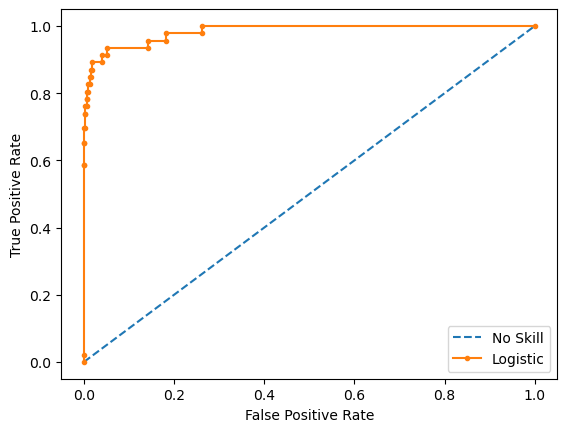

In [45]:
x, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                          n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=2)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict_proba(x_test)
y_pred = y_pred[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()